<class 'numpy.ndarray'>


Gibbs Sampling: 100%|██████████| 50/50 [00:10<00:00,  4.58it/s]

Mean acceptance rate: 0.000


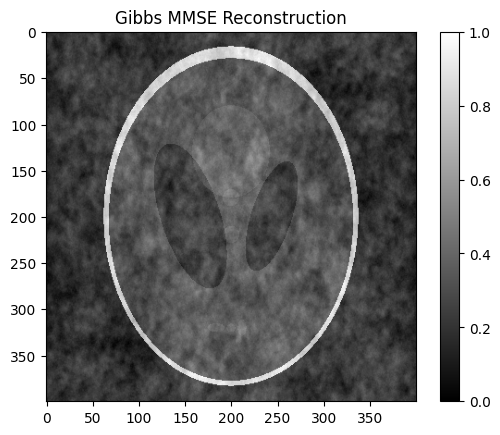

In [ ]:
import sys
import os

# Add the parent directory of MAP to sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), r"C:\Users\kostanjsek\bachelor_project"))
if project_root not in sys.path:
    sys.path.insert(0, project_root)


import torch
import numpy as np
import skimage as ski
import matplotlib.pyplot as plt
from MAP.masks import (
    PseudoRandomColumnMask,
    SimpleMask,
    BernoulliMask,
    CenteredBernoulliMask,
    VariableDensityMask,
)
from MAP.map_tv_minimize import MAPEstimator
from MMSE.mmse_mala import MMSEEstimatorMALA

from MMSE.mmse_gibbs import MMSEEstimatorGibbs


# load iamge
shepp_logan = ski.data.shepp_logan_phantom()

# create mask (in the F domain)
column_mask = SimpleMask(2).mask_columns(shepp_logan)
row_mask = SimpleMask(3).mask_rows(shepp_logan) 
bernoulli_mask = BernoulliMask(0.88, seed=30).generate(shepp_logan.shape)
centered_bernoulli_mask = CenteredBernoulliMask(0.75, 0.25, seed=30).generate(
    shepp_logan.shape
)
vd_mask = VariableDensityMask("gaussian", 2, seed=30).generate(shepp_logan.shape)
pseudorand_mask = PseudoRandomColumnMask(shepp_logan.shape, acceleration=8, seed=30).get_mask()

# the 'actual' measurement
y = centered_bernoulli_mask* np.fft.fft2(shepp_logan)

y_norm = y / np.max(y)


#mala_estimator = MMSEEstimatorMALA(centered_bernoulli_mask, y, 0.95, 200, 100e-2, 1e-9, 250, 2, 100)
gibbs_estimator = MMSEEstimatorGibbs(centered_bernoulli_mask, 0.01, 0.01, 0.1, 1e-3, 1e-2, 5, 50)

gibbs_estimator.sample(y)
# gibbs plot
plt.imshow(gibbs_estimator.compute_mmse_estimate(y), cmap="gray")
plt.title("Gibbs MMSE Reconstruction")
plt.colorbar()
plt.show()

